<a href="https://colab.research.google.com/github/mu-dinesh-varma/ML_Kamal_Chowdary_slides/blob/main/DFT_basics_SCF%2C_OPT%2C_Freq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install packages

In [ ]:
! pip install pyscf
! pip install rdkit
! pip install geometric

## Run single point energy calculation

We will generate the geometry with SMILES using RDKit. Refer to previous session for more details.

(https://github.com/vinayak2019/python_quantum_chemistry_introductory/blob/main/Input_structure_for_QC_calculations.ipynb)

In [ ]:
# import these definitions
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True


# generate water molecule
smiles = "O"
mol = Chem.MolFromSmiles(smiles)
mol = Chem.AddHs(mol)
Chem.AllChem.EmbedMolecule(mol)
Chem.AllChem.SetBondLength(mol.GetConformer(0),0,1,1.5) # for demonstration
Chem.MolToXYZFile(mol, "water.xyz")
mol

Using the XYZ file of water, we will run a DFT calculation. This will be an energy calculation

In [ ]:
# import the package
from pyscf import gto, scf

mol = gto.M(atom="water.xyz")

# set basis set
mol.basis = "sto3g"

# set the functional
mf = mol.KS()
mf.xc = 'b3lyp'

# run energy calculations
mf.kernel()

## How did we get the energy?

Let us start with Schrodinger equation

\begin{equation}
HΨ(r,R)=E(r,R)Ψ(r,R)
\end{equation}

where Ψ(r,R) is the wavefunction, E(r,R) is the energy (this is what we want), r and R are electronic and nuclear coordinates.

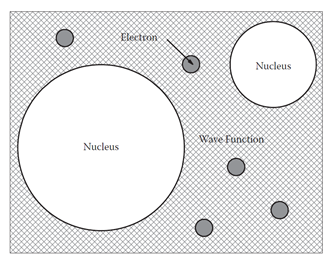









\begin{equation}
H=T_e+T_n+V_{ee}+V_{ne}+V_{nn}
\end{equation}

The time-independent Hamiltonian (H) is composed of the potential energy (V) and kinetic energy (T). The potential energy of the atomic system can be decomposed into nucleus-electron interaction (V_ne ), nucleus-nucleus interaction (V_nn ), and electron-electron interaction (V_ee ) energies. Similarly, the kinetic energy has contributions from the electrons (T_e ) and nuclei (T_n ). On incorporating the Born-Oppenheimer approximation, the nuclear and electronic motions are decoupled, resulting in the electronic Hamiltonian (H_e )

\begin{equation}
H_e=T_e+V_{ee}+V_{ne}
\end{equation}

The V_ee is the challenging part. In Hartree Fock approximation,

\begin{equation}
V_{ee}=V_{H}+V_{x}
\end{equation}

where V_H is the Hartree energy (Coulomb interaction) and V_x is the exchange energy (due to Pauli's exclusion rule). Electron correlation is never accounted.


To compute energy for n-electron system, we need 3n dimensional equation. Density functional theory reduces the problem to 3 dimension electron density ρ(x,y,z)

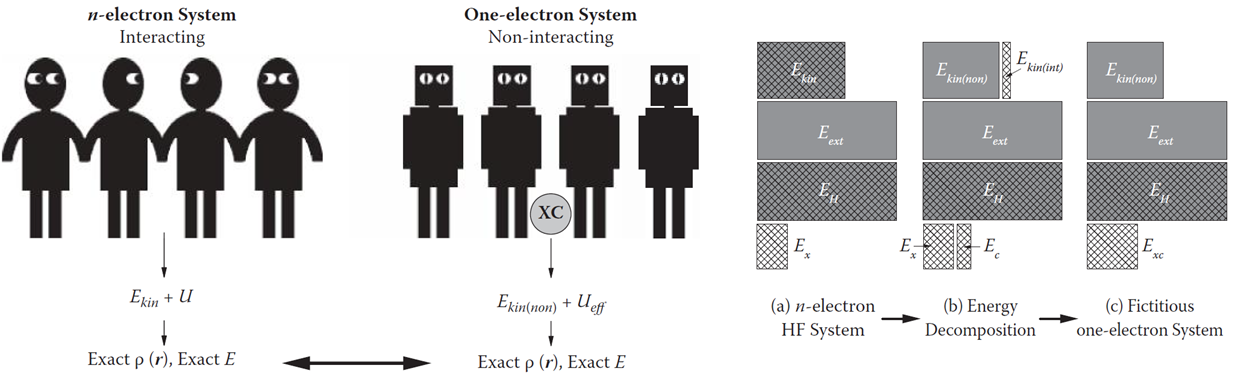

In DFT, we solve Kohn-Sham equations which is smiliar to Schrodinger equation. The DFT functional arise due to different proposed methods to deal with E_xc.

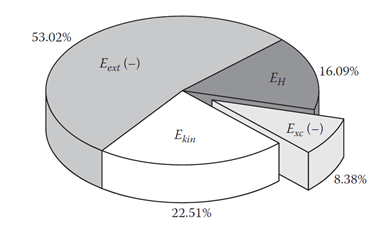

For evaluating energy we use iterative self-consistent loop.

## DFT functionals

The functionals can be classifed into


* local density approximations (LDA; xc energy depends only on the electron density)

* generalized gradient approximations (GGA; xc energy also depends on the density gradient)

* meta-GGAs (xc energy also depends on the kinetic energy density and/or the density Laplacian)

* non-local correlation functionals (xc energy involves a double integral)

* hybrid density functionals (a fraction of exact exchange is used)

* long-range corrected density functionals (exact exchange is used with a modified interaction kernel)


**B3LYP** is a hybrid functional

Further reading - https://pyscf.org/user/dft.html

Image source - Compuational Materials Science - An Introduction by June Gunn Lee

## Understanding basis set

We used STO-3G basis set in the previous cell. In this section let us understand what STO-3G means. The cell below has the helper functions for plotting.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pyscf.gto.basis import load

def plot_primitive_gaussian(alpha,label=None):
    # set the range for r
    r = np.arange(-5,5,0.1)

    # gaussian function
    g = np.exp(-alpha * r * r)

    # plot
    plt.plot(r,g, label=label)


def plot_contracted_gaussian(contracted_gaussians, label="contracted"):
    # set the range for r
    r = np.arange(-5,5,0.1)

    # add the gaussians
    gs = np.zeros_like(r)
    for i in range(1,len(contracted_gaussians[0])):
      gs = np.add(gs,contracted_gaussians[0][i][1] * np.exp(-contracted_gaussians[0][i][0] * r * r))

    # normalize
    gs = gs / np.max(gs)

    # plot
    plt.plot(r,gs, 'o',label=label)


def plot_slater():
    # set the range for r
    r = np.arange(-5,5,0.1)

    # slater function
    slater_1s = (1 / np.sqrt(np.pi)) * np.exp(-abs(r))
    slater_1s = slater_1s / np.max(slater_1s)

    # plot
    plt.plot(r,slater_1s, '*',label="slater")


Atomic orbital in quantum chemistry are described by Slater functions which are of the form

\begin{equation}
R(r) = N r^{n − 1} e^{−\zeta r}
\end{equation}

The Hydrogen 1s orbital is represented as

\begin{equation}
S_1 (r) = e^{-\zeta _1 r}/ \sqrt{\pi}
\end{equation}



In [ ]:
# the 1s Slater function
plot_slater()

The Slater functions can be represneted by Gaussian functions which reduce the computational complexity. The gaussian functions are of form

\begin{equation}
G_{n} (r) = C_n e^{-\alpha r^2}
\end{equation}

We look at the parameters for STO-3G basis set for Hydrogen atom. For each type of orbital, the basis functions has 3 primitive gaussian functions. The output for each gaussian is of the form [α,c]

\begin{equation}
S_G(r) = \sum_j C_j e^{-\alpha_j
r^2}
\end{equation}

For Hydrogen atom, we only have 1s orbital.

In [ ]:
load('sto3g', 'H')

Let's plot the gaussian functions and compare with Slater function

In [ ]:
# plot the 3 primitive gaussian
plot_primitive_gaussian(alpha=3.42525091,label=0)
plot_primitive_gaussian(alpha=0.62391373,label=1)
plot_primitive_gaussian(alpha=0.1688554,label=2)

# plot the contracted gaussian function
plot_contracted_gaussian(load('sto3G', 'H'), label="sto3g")

# plot slater
plot_slater()

# add legends
plt.legend()

For Carbon atom, we need to consider 1s, 2s and 2p orbitals. All of these are modelled by 3 primitive gaussian functions with STO-3G basis set.

In [ ]:
load('sto3g', 'C')

We need better description of valence electrons that are invovled in most Chemistry that happens. So, we can use more gaussian for valence electrons. Some gaussian functions will describe region close to nucleus (large ζ) while other with small ζ will be used for long-range

In 3-21G basis set, we use 3 gaussians for core-shell (1s) and 2 gaussians for valence short-range and 1 gaussian for valence long-range (2s, 2p). Such a basis set is a double-zeta (DZ) basis set or split-valence (SV) basis set.

In [ ]:
load("3-21g",'C')

In 6-31G basis set, the core-shell uses 6 gaussian functions

In [ ]:
# comparing STO-3G and 6-31G for Hydrogen 1s orbital
plot_contracted_gaussian(load('sto3g', 'H'), label="sto3g")
plot_contracted_gaussian(load('6-31G', 'H'), label="6-31g")

plot_slater()
plt.legend()

The valence orbitals can be represented by zetas - triple zeta (TZ), quadraple zeta (QZ) ...

6-311G is an example of triple zeta basis set

In [ ]:
load("6-311g",'C')

In cases were polarization (p/*) is needed, you can add gaussian functions of higher angular momemtum. For p-orbital you can add d-functions

In [ ]:
load("6-31g*",'C')

To add polarization to Hydrogen atoms, you need **

In [ ]:
# '*' does not add p-functions to s
load("6-31g*",'H')

In [ ]:
# '**' does not add p-functions to s
load("6-31g**",'H')

For a list of basis sets, visit https://www.basissetexchange.org/

## Geometry optimization

Similar to energy calculation we use iterative self-consistent loop to solve the Kohn-Sham equations.

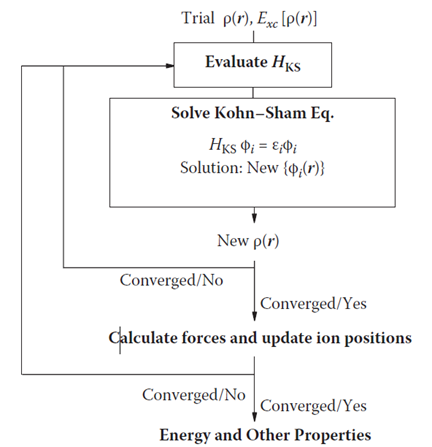

In [ ]:
from pyscf.geomopt.geometric_solver import optimize

# create the pyscf molecule
mol = gto.M(atom="water.xyz")

# set basis set
mol.basis = "sto3g"

# set the functional
mf = mol.KS()
mf.xc = 'b3lyp'

# run optimatization  calculations
mol_eq = optimize(mf)

In [ ]:
# save the optimized geometry for visualization
mol_eq.tofile("opt_water.xyz")

We can set the convergence criterion

In [ ]:
conv_params = {
    'convergence_energy': 1e-1,  # Eh
    'convergence_grms': 3e-1,    # Eh/Bohr
    'convergence_gmax': 4.5e-1,  # Eh/Bohr
    'convergence_drms': 1.2e-1,  # Angstrom
    'convergence_dmax': 1.8e-1,  # Angstrom
}

mol_eq = optimize(mf, **conv_params)


## Frequency calculation

Running frequency calculation is one way to find out whether the optimzation reached an energy minima. Remember we only used the first derivative (gradient) for convergence check. The frequency calculations get the second derrivative (hessian) which will tell us whether it is a maxima (negative values for frequency) or minima (positive values) on the energy surface

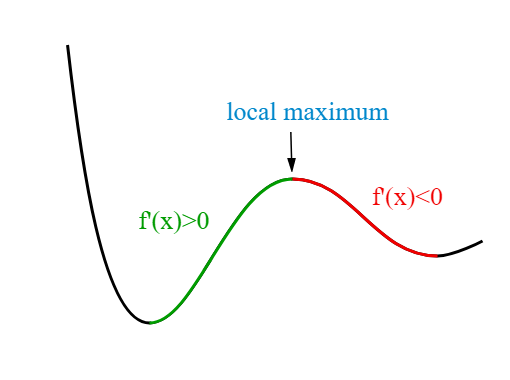

In [ ]:
# create a molecule object
mol = gto.M(atom="opt_water.xyz")

# set basis set
mol.basis = "sto3g"

# set the functional
mf = mol.KS()
mf.xc = 'b3lyp'

# run frequency calculation
mf.run()
hessian = mf.Hessian().kernel()

Now we can get the computed frequencies

In [ ]:
from pyscf.hessian import thermo

# getting the frequncy data from the calculation
freq_info = thermo.harmonic_analysis(mf.mol, hessian)
freq_info["freq_wavenumber"]

## Exercise

Run the frequncy calculation for the unoptimized water molecule (water.xyz). What do you observe?

In [ ]:
# YOUR CODE HERE

Change the basis set and functional and rerun the frequency calculation for optimzed water ("opt_water.xyz"). Which functional/basis set gives better results?

Experimental IR spectrum https://webbook.nist.gov/cgi/cbook.cgi?ID=C7732185&Type=IR-SPEC&Index=0#IR-SPEC

In [ ]:
# YOUR CODE HERE

Please complete this survey to help me improve the quality of future workshops

https://docs.google.com/forms/d/e/1FAIpQLSdpn3lpq1n1fA4aqLDvfA9VARsTNBnD5p6gcCtJ_VaYGiYxlA/viewform?usp=sf_link